Selecionando o Database

In [26]:
USE DW_32;

Commands completed successfully.

Total execution time: 00:00:00.171

Criando schemas

In [27]:
USE DW_32
GO
--CREATE SCHEMA BRONZE
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='BRONZE')
   EXEC('CREATE SCHEMA BRONZE');
    --CREATE SCHEMA BRONZE
GO
--CREATE SCHEMA SILVER
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='SILVER')
 EXEC('CREATE SCHEMA SILVER');
GO
--CREATE SCHEMA GOLD
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='GOLD')
EXEC('CREATE SCHEMA GOLD');
GO
--CREATE SCHEMA LOG
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='LOG')
    EXEC('CREATE SCHEMA LOG');
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:01.253

Diagrama de star schema

Criando tabela baseada no CSV

In [28]:
CREATE TABLE [DW_32].[BRONZE].[despesas](
	[ano_mes_lancamento] [varchar](7) NULL,
	[cod_orgao_superior] [varchar](5) NULL,
	[nome_orgao_superior] [varchar](100) NULL,
	[cod_orgao_subordinado] [varchar](5) NULL,
	[nome_orgao_subordinado] [varchar](100) NULL,
	[cod_unidade_gestora] [varchar](10) NULL,
	[nome_unidade_gestora] [varchar](100) NULL,
	[cod_gestao] [varchar](5) NULL,
	[nome_gestao] [varchar](100) NULL,
	[cod_unidade_orcamentaria] [varchar](10) NULL,
	[nome_unidade_orcamentaria] [varchar](100) NULL,
	[cod_funcao] [varchar](5) NULL,
	[nome_funcao] [varchar](100) NULL,
	[cod_subfuncao] [varchar](5) NULL,
	[nome_subfuncao] [varchar](100) NULL,
	[cod_prog_orcamentario] [varchar](10) NULL,
	[nome_prog_orcamentario] [varchar](250) NULL,
	[cod_acao] [varchar](10) NULL,
	[nome_acao] [varchar](250) NULL,
	[cod_plano_orcamentario] [varchar](10) NULL,
	[plano_orcamentario] [varchar](250) NULL,
	[cod_prog_governo] [varchar](10) NULL,
	[nome_prog_governo] [varchar](250) NULL,
	[uf] [varchar](2) NULL,
	[municipio] [varchar](100) NULL,
	[cod_subtitulo] [varchar](10) NULL,
	[nome_subtitulo] [varchar](250) NULL,
	[cod_localizador] [varchar](20) NULL,
	[nome_localizador] [varchar](250) NULL,
	[sigla_localizador] [varchar](5) NULL,
	[descricao_compl_localizador] [varchar](250) NULL,
	[cod_autor_emenda] [varchar](20) NULL,
	[nome_autor_emenda] [varchar](250) NULL,
	[cod_categoria_economica] [varchar](5) NULL,
	[nome_categoria_economica] [varchar](100) NULL,
	[cod_grupo_despesa] [varchar](5) NULL,
	[nome_grupo_despesa] [varchar](100) NULL,
	[cod_elemento_despesa] [varchar](10) NULL,
	[nome_elemento_despesa] [varchar](250) NULL,
	[cod_modalidade_despesa] [varchar](5) NULL,
	[modalidade_despesa] [varchar](150) NULL,
	[valor_empenhado] [varchar](20) NULL,
	[valor_liquidado] [varchar](20) NULL,
	[valor_pago] [varchar](20) NULL,
	[valor_restos_pagar_inscritos] [varchar](20) NULL,
	[valor_restos_pagar_cancelado] [varchar](20) NULL,
	[valor_restos_pagar_pagos] [varchar](20) NULL
) ON [PRIMARY]
GO


Commands completed successfully.

Total execution time: 00:00:00.229

Criando bulk insert com os dados do CSV das Despesas de janeiro  de 2022

In [29]:
USE DW_32
GO
TRUNCATE TABLE BRONZE.despesas
GO
BULK
INSERT BRONZE.despesas
FROM 'C:\DWE2023\desafio\fontes\202201_despesas.csv' --Ler Arquivo no Servidor
WITH
(
	codepage='65001',  -- { 'ACP' | 'OEM' | 'RAW' | 'code_page' } ] 
    DATAFILETYPE ='char',--      { 'char' | 'native'| 'widechar' | 'widenative' } ]         
	fieldterminator=';',
    rowterminator='\n',
	maxerrors=0,
	FORMAT = 'CSV',
    firstrow=2,
	KEEPNULLS

);

Commands completed successfully.

Commands completed successfully.

(37530 rows affected)

Total execution time: 00:00:08.556

Criando bulk insert com os dados do CSV das Despesas de fevereiro de 2022

In [30]:
USE DW_32
GO
BULK

INSERT BRONZE.despesas
FROM 'C:\DWE2023\desafio\fontes\202202_despesas.csv' --Ler Arquivo no Servidor
WITH
(
	codepage='65001',  -- { 'ACP' | 'OEM' | 'RAW' | 'code_page' } ] 
    DATAFILETYPE ='char',--      { 'char' | 'native'| 'widechar' | 'widenative' } ]         
	fieldterminator=';',
    rowterminator='\n',
	maxerrors=0,
	FORMAT = 'CSV',
    firstrow=2,
	KEEPNULLS
);

Commands completed successfully.

(50987 rows affected)

Total execution time: 00:00:11.057

Criando bulk insert com os dados do CSV das Despesas de março de 2022

In [31]:
USE DW_32
GO
BULK
INSERT BRONZE.despesas
FROM 'C:\DWE2023\desafio\fontes\202203_despesas.csv' --Ler Arquivo no Servidor
WITH
(
	codepage='65001',  -- { 'ACP' | 'OEM' | 'RAW' | 'code_page' } ] 
    DATAFILETYPE ='char',--      { 'char' | 'native'| 'widechar' | 'widenative' } ]         
	fieldterminator=';',
    rowterminator='\n',
	maxerrors=0,
	FORMAT = 'CSV',
    firstrow=2,
	KEEPNULLS
);

Commands completed successfully.

: Msg 1105, Level 17, State 2, Line 3
Could not allocate space for object 'BRONZE.despesas' in database 'DW_32' because the 'PRIMARY' filegroup is full. Create disk space by deleting unneeded files, dropping objects in the filegroup, adding additional files to the filegroup, or setting autogrowth on for existing files in the filegroup.

Total execution time: 00:00:39.995

Criando Tabela de log

In [32]:
USE [DW_32]
GO
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='LOG_CARGAS' AND xtype='U')

CREATE TABLE LOG.LOG_CARGAS
 (ID INT IDENTITY(1,1) NOT NULL PRIMARY KEY,
 NUMERO_ERRO INT,
 SERVERIDADE_ERRO INT,
 ESTADO_ERRO  INT,
 PROC_ERRO NVARCHAR(255),
 LINHA_ERRO INT,
 MSG_ERRO NVARCHAR(255),
 SITUACAO NVARCHAR(10),
 PROCESSO NVARCHAR(30),
 DATA_INI DATETIME,
 DATA_FIM DATETIME  
 )

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:03.163

In [33]:

USE DW_32
GO

-- ORGAO SUPERIOR
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_Orgao_Superior' AND xtype='U')

CREATE TABLE [SILVER].[D_Orgao_Superior](
	[SK_orgao_superior] [int] IDENTITY(1,1),
    [cod_orgao_superior] [varchar](5) NOT NULL,
    [nome_orgao_superior] [varchar](100) NOT NULL,
    PRIMARY KEY CLUSTERED 
(
	[SK_orgao_superior] ASC
) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO
-- ORGAO SUBORDINADO
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_Orgao_Subordinado' AND xtype='U')
CREATE TABLE SILVER.D_Orgao_Subordinado(
    SK_orgao_subordinado int IDENTITY(1,1) ,
    SK_orgao_superior int FOREIGN KEY REFERENCES SILVER.D_Orgao_Superior(SK_orgao_superior),
    cod_orgao_subordinado varchar(5) NOT NULL,
    nome_orgao_subordinado varchar(100) NOT NULL,
   

    PRIMARY KEY CLUSTERED 
(
	[SK_orgao_subordinado] ASC
) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO
-- UNIDADE GESTORA
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_Unidade_Gestora' AND xtype='U')
CREATE TABLE SILVER.D_Unidade_Gestora(
    SK_unidade_gestora  int IDENTITY(1,1) ,
   
    cod_unidade_gestora  varchar(10) NOT NULL,
    nome_unidade_gestora varchar(100) NOT NULL,
    PRIMARY KEY CLUSTERED 
(
	[SK_unidade_gestora] ASC
) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

-- Gestao
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_Gestao' AND xtype='U')
CREATE TABLE SILVER.D_Gestao(
    SK_gestao  int IDENTITY(1,1) ,
    
	cod_gestao varchar(5) not null, 
    nome_gestao varchar(100) not null
    PRIMARY KEY CLUSTERED 
(
	[SK_gestao] ASC
) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO
--Grupo DESPESA
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_Grupo_Despesa' AND xtype='U')
CREATE TABLE SILVER.D_Grupo_Despesa(
    SK_grupo_despesa int IDENTITY(1,1) ,   
    
    cod_grupo_despesa varchar(5) NOT NULL,
    nome_grupo_despesa varchar(100) NOT NULL
    PRIMARY KEY CLUSTERED 
(
	[SK_grupo_despesa] ASC
) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

-- TEMPO
IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='D_Tempo' AND xtype='U')
CREATE TABLE SILVER.D_Tempo(
    SK_tempo  int IDENTITY(1,1) ,
   
    ano_mes_lancamento varchar(7) not null
    PRIMARY KEY CLUSTERED 
(
	[SK_tempo] ASC
) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

-- FATO DESPESA

IF NOT EXISTS
  (SELECT * FROM sysobjects WHERE name='FATO_DESPESA' AND xtype='U')
CREATE TABLE GOLD.FATO_DESPESA
(
SK_DESPESA INT IDENTITY(1,1) ,
SK_tempo   int  FOREIGN KEY REFERENCES SILVER.D_Tempo(SK_tempo),
SK_orgao_superior int FOREIGN KEY REFERENCES SILVER.D_Orgao_Superior(SK_orgao_superior),
SK_orgao_subordinado int FOREIGN KEY REFERENCES SILVER.D_Orgao_Subordinado(SK_orgao_subordinado),
SK_gestao int FOREIGN KEY REFERENCES SILVER.D_Gestao(SK_gestao),
SK_unidade_gestora  int  FOREIGN KEY REFERENCES SILVER.D_Unidade_Gestora(SK_unidade_gestora ),
SK_grupo_despesa int  FOREIGN KEY REFERENCES SILVER.D_Grupo_Despesa(SK_grupo_despesa),
valor_empenhado varchar(20) not null,
valor_liquidado varchar(20)  not null,
valor_pago varchar(20)  not null,

 PRIMARY KEY CLUSTERED 
(
	[SK_DESPESA] ASC
) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:05.437

Diagrama despesas - Star Schema

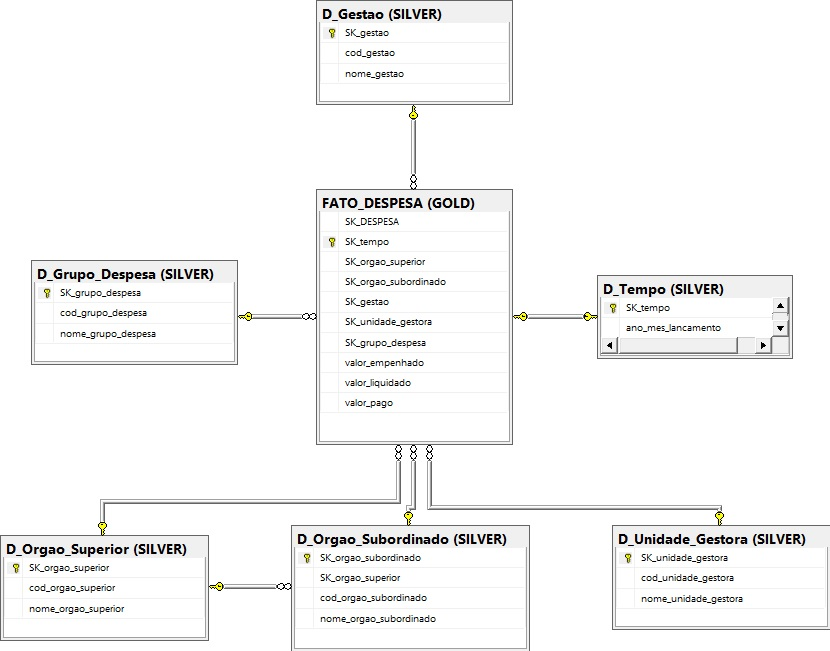

In [34]:
USE DW_32
GO
BEGIN TRANSACTION;  
	DECLARE @VDATA_INI DATETIME;
	SET @VDATA_INI= GETDATE();

BEGIN TRY  

--CARGA ORGÃO SUPERIOR
INSERT INTO DW_32.SILVER.D_Orgao_Superior ([cod_orgao_superior] ,[nome_orgao_superior])
SELECT DISTINCT [cod_orgao_superior] ,[nome_orgao_superior] FROM [BRONZE].[despesas] WHERE cod_orgao_superior IS NOT NULL AND nome_orgao_superior IS NOT NULL
--CARGA GESTÃO
--CARGA ÓRGÃO SUBORDINADO
INSERT INTO DW_32.SILVER.D_Orgao_Subordinado ([cod_orgao_subordinado],[nome_orgao_subordinado])
SELECT DISTINCT [cod_orgao_subordinado],[nome_orgao_subordinado] FROM [BRONZE].[despesas] WHERE cod_orgao_subordinado IS NOT NULL AND nome_orgao_subordinado IS NOT NULL
--CARGA GESTÃO
INSERT INTO DW_32.SILVER.D_Gestao ([cod_gestao] ,[nome_gestao])
SELECT DISTINCT [cod_gestao],[nome_gestao] FROM [BRONZE].[despesas] WHERE cod_gestao IS NOT NULL AND nome_gestao IS NOT NULL
--CARGA GRUPO DESPESA
INSERT INTO DW_32.SILVER.D_Grupo_Despesa ([cod_grupo_despesa],[nome_grupo_despesa])
SELECT DISTINCT [cod_grupo_despesa],[nome_grupo_despesa] FROM [BRONZE].[despesas] WHERE cod_grupo_despesa IS NOT NULL AND nome_grupo_despesa IS NOT NULL
--CARGA TEMPO
INSERT INTO DW_32.SILVER.D_Tempo ([ano_mes_lancamento])
SELECT DISTINCT[ano_mes_lancamento] FROM [BRONZE].[despesas] WHERE ano_mes_lancamento IS NOT NULL 
--CARGA UNIDADE GESTORA
INSERT INTO DW_32.SILVER.D_Unidade_Gestora ([cod_unidade_gestora],[nome_unidade_gestora])
SELECT DISTINCT [cod_unidade_gestora],[nome_unidade_gestora] FROM [BRONZE].[despesas] WHERE cod_unidade_gestora IS NOT NULL AND nome_unidade_gestora IS NOT NULL


--CARGA LOG
INSERT INTO [LOG].[LOG_CARGAS](
           [NUMERO_ERRO],
           [SERVERIDADE_ERRO],
           [ESTADO_ERRO],
           [PROC_ERRO],
           [LINHA_ERRO],
           [MSG_ERRO],
           [SITUACAO],
           [PROCESSO],
           [DATA_INI],
		   [DATA_FIM])
     VALUES
        (ERROR_NUMBER(),
        ERROR_SEVERITY(),
        ERROR_STATE(),
        ERROR_PROCEDURE(),
        ERROR_LINE() ,
        ERROR_MESSAGE() ,
        'SUCESSO',
        'CARGA DIMENSOES',
		@VDATA_INI,
		GETDATE()
		)

IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
 

END TRY  
--FIM TRY 
--INICA CATCH
BEGIN CATCH
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 

INSERT INTO [LOG].[LOG_CARGAS]
           ([NUMERO_ERRO],
           [SERVERIDADE_ERRO],
           [ESTADO_ERRO],
           [PROC_ERRO],
           [LINHA_ERRO],
           [MSG_ERRO],
           [SITUACAO],
           [PROCESSO],
           [DATA_INI],
		   [DATA_FIM])
     VALUES
        (ERROR_NUMBER(),
        ERROR_SEVERITY(),
        ERROR_STATE(),
        ERROR_PROCEDURE(),
        ERROR_LINE() ,
        ERROR_MESSAGE() ,
        'ERRO',
        'CARGA DIMENSOES',
		@VDATA_INI,
		GETDATE()
		)     
END CATCH;  

Commands completed successfully.

(22 rows affected)

(238 rows affected)

(187 rows affected)

(6 rows affected)

(2 rows affected)

(3370 rows affected)

(1 row affected)

Total execution time: 00:00:05.432

In [35]:
USE DW_32
GO

BEGIN TRANSACTION;  
   DECLARE @VDATA_INI DATETIME;
   DECLARE @VPROCESSO VARCHAR(30);
   SET @VPROCESSO= 'CARGA FATO'

BEGIN TRY  

MERGE GOLD.FATO_DESPESA AS DESTINO

USING (
SELECT  
        F.SK_tempo,
        B.SK_orgao_superior,
        C.SK_orgao_subordinado,
        E.SK_gestao,
        G.SK_unidade_gestora,
        D.SK_grupo_despesa,
        A.valor_empenhado,
        A.valor_liquidado,
        A.valor_pago
       

  FROM DW_32.BRONZE.despesas A
 
  
  INNER JOIN SILVER.D_Orgao_Superior B
  ON A.cod_orgao_superior=B.cod_orgao_superior

   
  INNER JOIN SILVER.D_Orgao_Subordinado C
  ON A.cod_orgao_subordinado=C.cod_orgao_subordinado


  INNER JOIN SILVER.D_Grupo_Despesa D
  ON A.cod_grupo_despesa= D.cod_grupo_despesa
  
  INNER JOIN SILVER.D_Gestao E
  ON A.cod_gestao= E.cod_gestao

  INNER JOIN SILVER.D_Tempo F
  ON A.ano_mes_lancamento= F.ano_mes_lancamento

  INNER JOIN SILVER.D_Unidade_Gestora G
  ON A.cod_unidade_gestora= G.cod_unidade_gestora


  ) AS ORIGEM
ON ( DESTINO.valor_empenhado = ORIGEM.valor_empenhado
AND DESTINO.valor_liquidado = ORIGEM.valor_liquidado 
AND DESTINO.valor_pago = ORIGEM.valor_pago 
)
-- Há registro no destino e na origem
WHEN MATCHED 

THEN 
    UPDATE SET    SK_tempo=ORIGEM.SK_tempo,
                  SK_orgao_superior=ORIGEM.SK_orgao_superior,
                  SK_orgao_subordinado=ORIGEM.SK_orgao_subordinado,
                  SK_gestao=ORIGEM.SK_gestao,
                  SK_unidade_gestora=ORIGEM.SK_unidade_gestora,
                  SK_grupo_despesa=ORIGEM.SK_grupo_despesa,
                  valor_empenhado=ORIGEM.valor_empenhado  ,
                  valor_liquidado=ORIGEM.valor_liquidado ,
                  valor_pago=ORIGEM.valor_pago 

--Quando não há registro no destino e há na origem
WHEN NOT MATCHED 

THEN 
   INSERT  
           (SK_tempo,SK_orgao_superior,SK_orgao_subordinado,SK_gestao,SK_unidade_gestora,SK_grupo_despesa,valor_empenhado,valor_liquidado,valor_pago)
     VALUES
           (      ORIGEM.SK_tempo,
                  ORIGEM.SK_orgao_superior,
                  ORIGEM.SK_orgao_subordinado,
                  ORIGEM.SK_gestao,
                  ORIGEM.SK_unidade_gestora,
                  ORIGEM.SK_grupo_despesa,
                  ORIGEM.valor_empenhado ,
                  ORIGEM.valor_liquidado ,
                  ORIGEM.valor_pago  
            );

--FIM MERGE
-- GRAVA LOG
INSERT INTO [LOG].[LOG_CARGAS]
           ([NUMERO_ERRO],
           [SERVERIDADE_ERRO],
           [ESTADO_ERRO],
           [PROC_ERRO],
           [LINHA_ERRO],
           [MSG_ERRO],
           [SITUACAO],
           [PROCESSO],
           [DATA_INI],
		   [DATA_FIM])
     VALUES
        (ERROR_NUMBER(),
        ERROR_SEVERITY(),
        ERROR_STATE(),
        ERROR_PROCEDURE(),
        ERROR_LINE() ,
        ERROR_MESSAGE() ,
        'SUCESSO',
        @VPROCESSO,
		@VDATA_INI,
		GETDATE()
		)
SELECT 'SUCESSO ANTES',@@TRANCOUNT
IF @@TRANCOUNT > 0  
    COMMIT TRANSACTION;  
SELECT 'SUCESSO DEPOIS',@@TRANCOUNT    
END TRY  
BEGIN CATCH
SELECT 'ERRO ANTES',@@TRANCOUNT    
 	IF @@TRANCOUNT > 0  
        ROLLBACK TRANSACTION; 
SELECT 'ERRO DEPOIS',@@TRANCOUNT    
INSERT INTO [LOG].[LOG_CARGAS]
           ([NUMERO_ERRO],
           [SERVERIDADE_ERRO],
           [ESTADO_ERRO],
           [PROC_ERRO],
           [LINHA_ERRO],
           [MSG_ERRO],
           [SITUACAO],
           [PROCESSO],
           [DATA_INI],
		   [DATA_FIM])
     VALUES
        (ERROR_NUMBER(),
        ERROR_SEVERITY(),
        ERROR_STATE(),
        ERROR_PROCEDURE(),
        ERROR_LINE() ,
        ERROR_MESSAGE() ,
        'ERRO',
        @VPROCESSO,
		@VDATA_INI,
		GETDATE()
		)


END CATCH;  




Commands completed successfully.

(87794 rows affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:02.470

(No column name),(No column name)
SUCESSO ANTES,1


(No column name),(No column name)
SUCESSO DEPOIS,0


Qual o total em Jan/2022 Valor Pago (R$) para cada Órgão Superior?

In [39]:
SELECT DISTINCT B.nome_orgao_superior,
SUM(CAST(REPLACE(A.valor_pago, ',', '.') as decimal(18,4))) AS valor_pago
FROM GOLD.FATO_DESPESA A
INNER JOIN SILVER.D_Orgao_Superior B ON A.SK_orgao_superior = B.SK_orgao_superior
INNER JOIN SILVER.D_Tempo C ON C.ano_mes_lancamento = '2022/01'
GROUP BY B.nome_orgao_superior ORDER BY valor_pago DESC

(21 rows affected)

Total execution time: 00:00:00.296

nome_orgao_superior,valor_pago
Ministério da Economia,321466477646.2000
Ministério do Trabalho,101371522762.2400
Ministério da Saúde,16034325741.4600
Ministério da Cidadania,14795177427.0600
Ministério da Educação,13706922850.0300
Ministério da Defesa,9004344635.5200
Ministério de Minas e Energia,4250286377.6500
Ministério do Desenvolvimento Regional,3209795202.1900
Ministério da Justiça e Segurança Pública,1941571157.3700
"Ministério da Agricultura, Pecuária e Abastec",964978462.7300


Quais os top 10 Órgãos Superiores referente a Jan/2022 em Valor Pago (R$)

In [38]:
SELECT TOP 10 B.nome_orgao_superior,
 SUM(CAST(REPLACE(A.valor_pago, ',', '.') as decimal(18,4))) AS valor_pago
FROM GOLD.FATO_DESPESA A
INNER JOIN SILVER.D_Orgao_Superior B ON A.SK_orgao_superior = B.SK_orgao_superior
INNER JOIN SILVER.D_Tempo C ON C.ano_mes_lancamento = '2022/01'
GROUP BY B.nome_orgao_superior ORDER BY valor_pago DESC

(10 rows affected)

Total execution time: 00:00:00.883

nome_orgao_superior,total_valor_pago
Ministério da Economia,321466477646.2000
Ministério do Trabalho,101371522762.2400
Ministério da Saúde,16034325741.4600
Ministério da Cidadania,14795177427.0600
Ministério da Educação,13706922850.0300
Ministério da Defesa,9004344635.5200
Ministério de Minas e Energia,4250286377.6500
Ministério do Desenvolvimento Regional,3209795202.1900
Ministério da Justiça e Segurança Pública,1941571157.3700
"Ministério da Agricultura, Pecuária e Abastec",964978462.7300


Qual o total no Trimestre de Valor Empenhado (R$) para cada Gestão

In [30]:
SELECT  
DISTINCT
 B.nome_gestao,
 SUM(CAST(REPLACE(A.valor_empenhado, ',', '.') as decimal(18,4))) AS total_empenhado
FROM GOLD.FATO_DESPESA A
INNER JOIN SILVER.D_Gestao B ON A.SK_gestao = B.SK_gestao
group by B.nome_gestao



(187 rows affected)

Total execution time: 00:00:00.189

nome_gestao,TotalEmpenhado
AGENCIA ESPACIAL BRASILEIRA - AEB,14229026.2000
AGENCIA NACIONAL DE AGUAS - ANA,245879175.2300
AGENCIA NACIONAL DE AVIACAO CIVIL,388120985.8600
AGENCIA NACIONAL DE ENERGIA ELETRICA,4289109262.9600
AGENCIA NACIONAL DE MINERACAO,7839704466.0400
AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,213181377.8600
AGENCIA NACIONAL DE TELECOMUNICACOES,384576171.4800
AGENCIA NACIONAL DE TRANSPORTES AQUAVIARIOS,126059431.7400
AGENCIA NACIONAL DE TRANSPORTES TERRESTRES,339426744.8900
AGENCIA NACIONAL DE VIGILANCIA SANITARIA,222795056.2900


Quais as Top 10 Gestão no Trimestre referente a valor empenhado?

In [31]:
SELECT  DISTINCT TOP 10

 B.nome_gestao,
 SUM(CAST(REPLACE(A.valor_empenhado, ',', '.') as decimal(18,4))) AS total_empenhado
FROM GOLD.FATO_DESPESA A
INNER JOIN SILVER.D_Gestao B ON A.SK_gestao = B.SK_gestao
group by B.nome_gestao
order by total_empenhado desc

(10 rows affected)

Total execution time: 00:00:00.202

nome_gestao,total_empenhado
TESOURO NACIONAL,1399731441129.4600
FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,326083772989.9500
INSTITUTO NACIONAL DO SEGURO SOCIAL,77917754280.0600
FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO,56432411665.2900
AGENCIA NACIONAL DE MINERACAO,7839704466.0400
AGENCIA NACIONAL DO PETROLEO,7400252786.5900
EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,5964701253.3100
AGENCIA NACIONAL DE ENERGIA ELETRICA,4289109262.9600
FUNDACAO OSWALDO CRUZ,3249557022.9100
EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA,3127154618.5200


Qual o total mês a mês de Valor Liquidado (R$) para cada Grupo de Despesa?

In [36]:

select 'janeiro' as mes, q.nome_grupo_despesa , FROM GOLD.FATO_DESPESA A, SILVER.D_Tempo T,SILVER.D_Grupo_Despesa Q where A.sk_tempo = T.SK_tempo and T.ano_mes_lancamento = '2022/01' and A.sk_grupo_despesa = Q.sk_grupo_despesa group by q.nome_grupo_despesa 
UNION ALL
select  'fevereiro' as mes,q.nome_grupo_despesa ,SUM(CAST(REPLACE(A.valor_liquidado, ',', '.') as decimal(18,4))) as valor_total FROM GOLD.FATO_DESPESA A, SILVER.D_Tempo T,SILVER.D_Grupo_Despesa Q where A.sk_tempo = T.SK_tempo and T.ano_mes_lancamento = '2022/02' and A.sk_grupo_despesa = Q.sk_grupo_despesa group by q.nome_grupo_despesa 
UNION ALL
select  'marco' as mes,q.nome_grupo_despesa ,SUM(CAST(REPLACE(A.valor_liquidado, ',', '.') as decimal(18,4)))  as valor_total FROM GOLD.FATO_DESPESA A, SILVER.D_Tempo T,SILVER.D_Grupo_Despesa Q where A.sk_tempo = T.SK_tempo and T.ano_mes_lancamento = '2022/03' and A.sk_grupo_despesa = Q.sk_grupo_despesa group by q.nome_grupo_despesa 


SUM(CAST(REPLACE(A.valor_liquidado, ',', '.') as decimal(18,4))) as valor_total

(18 rows affected)

Total execution time: 00:00:00.264

mes,nome_grupo_despesa,valor_total
janeiro,Amortização/Refinanciamento da Dívida,165905512842.4600
janeiro,Inversões Financeiras,4282034391.3100
janeiro,Juros e Encargos da Dívida,52288306158.1900
janeiro,Investimentos,9090426.8800
janeiro,Outras Despesas Correntes,100030174839.4000
janeiro,Pessoal e Encargos Sociais,22561908507.6100
fevereiro,Amortização/Refinanciamento da Dívida,3396754006.3000
fevereiro,Inversões Financeiras,3089737983.4300
fevereiro,Juros e Encargos da Dívida,38460931941.5100
fevereiro,Investimentos,223407660.9200


Quais os TOP 10 Grupo de Despesas referente a valor Liquidado (R$) em Fev/2022?

In [38]:
SELECT TOP 10 
b.nome_grupo_despesa,
SUM(CAST(REPLACE(A.valor_liquidado, ',', '.') as decimal(18,4))) as valor_total_liquidado
FROM
    GOLD.FATO_DESPESA A,
    SILVER.D_Grupo_Despesa B,
    SILVER.D_Tempo C
WHERE
    A.sk_grupo_despesa = B.sk_grupo_despesa and
    A.sk_tempo = c.sk_tempo and c.ano_mes_lancamento = '2022/02'
    group by b.nome_grupo_despesa
    Order by valor_total_liquidado desc


(6 rows affected)

Total execution time: 00:00:05.727

nome_grupo_despesa,valor_total_liquidado
Outras Despesas Correntes,144253119185.2100
Juros e Encargos da Dívida,38460931941.5100
Pessoal e Encargos Sociais,22972584596.5600
Amortização/Refinanciamento da Dívida,3396754006.3000
Inversões Financeiras,3089737983.4300
Investimentos,223407660.9200


Qual a variação %(MoM) de Valor Empenhado (R$) de Mar/2022 para Fev/2022 por Unidade Gestora

In [39]:
SELECT
    fevereiro.nome_unidade_gestora,
    fevereiro.valor_total as valor_fevereiro,
    marco.valor_total as valor_marco,
	(marco.valor_total - fevereiro.valor_total) / fevereiro.valor_total * 100 as variacao_percentual
    
FROM
    (SELECT
        q.nome_unidade_gestora,
        SUM(CAST(REPLACE(A.valor_empenhado, ',', '.') as decimal(18,4))) as valor_total
    FROM
        GOLD.FATO_DESPESA A,
        SILVER.D_Tempo T,
        SILVER.D_unidade_gestora Q
    WHERE
        A.sk_tempo = T.SK_tempo
        AND T.ano_mes_lancamento = '2022/02'
        AND A.sk_unidade_gestora = Q.sk_unidade_gestora
		AND CAST(REPLACE(A.valor_empenhado, ',', '.') as decimal(18,4)) > 0
    GROUP BY
        q.nome_unidade_gestora) as fevereiro
JOIN
    (SELECT
        q.nome_unidade_gestora,
        SUM(CAST(REPLACE(A.valor_empenhado, ',', '.') as decimal(18,4))) as valor_total
    FROM
        GOLD.FATO_DESPESA A,
        SILVER.D_Tempo T,
        SILVER.D_unidade_gestora Q
    WHERE
        A.sk_tempo = T.SK_tempo
        AND T.ano_mes_lancamento = '2022/03'
        AND A.sk_unidade_gestora = Q.sk_unidade_gestora
		AND CAST(REPLACE(A.valor_empenhado, ',', '.') as decimal(18,4)) > 0
    GROUP BY
        q.nome_unidade_gestora) as marco
ON fevereiro.nome_unidade_gestora = marco.nome_unidade_gestora




(2601 rows affected)

Total execution time: 00:00:00.622

nome_unidade_gestora,valor_fevereiro,valor_marco,variacao_percentual
",NST.FED.FARROUPILHA/CAMPUS DE SANTA ROSA",148683.7800,423139.9700,184.590500
1 BATALHAO DE COMUNICACOES,627738.3900,484823.2300,-22.766600
1 BATALHAO DE COMUNICACOES DIVISIONARIO,224567.4400,315593.3800,40.533800
1 BATALHAO DE GUARDA,380522.1700,477876.3300,25.584300
1 BATALHAO DE INFANTARIA DE SELVA(AEROMOVEL),443039.6100,61901.8500,-86.027900
1 BATALHAO DE POLICIA DO EXERCITO,681567.8000,213146.1500,-68.727000
1 BATALHAO FERROVIARIO,3757559.8400,1953238.3100,-48.018400
1 ESQUADRAO DE CAVALARIA LEVE,37790.1300,77303.0200,104.558700
1 GRUPO DE ARTILHARIA ANTIAEREA,304520.2100,44836.7600,-85.276200
1 REGIMENTO DE CARROS DE COMBATE,60222.9800,239729.4600,298.069700


Retorno o maior Valor Empenhado (R$) de Grupo de despesas em Fev/2022 para cada Órgão Superior.

In [45]:
SELECT 
B.nome_grupo_despesa,
D.nome_orgao_superior,
MAX(CAST(REPLACE(A.valor_empenhado, ',', '.') as decimal(18,4))) as valor_maximo_empenhado
FROM
    GOLD.FATO_DESPESA A,
    SILVER.D_Grupo_Despesa B,
    SILVER.D_Tempo C,
    SILVER.D_Orgao_Superior D
WHERE
    A.sk_grupo_despesa = B.sk_grupo_despesa and
    A.sk_tempo = c.sk_tempo and c.ano_mes_lancamento = '2022/02' AND
    A.sk_orgao_superior = D.sk_orgao_superior
    group by b.nome_grupo_despesa,D.nome_orgao_superior
    Order by valor_maximo_empenhado desc

(78 rows affected)

Total execution time: 00:00:00.082

nome_grupo_despesa,nome_orgao_superior,valor_maximo_empenhado
Amortização/Refinanciamento da Dívida,Ministério da Economia,217520000004.0000
Outras Despesas Correntes,Ministério da Cidadania,88609077600.0000
Juros e Encargos da Dívida,Ministério da Economia,39300000002.0000
Outras Despesas Correntes,Ministério do Trabalho,19000000000.0000
Outras Despesas Correntes,Ministério da Economia,14696908673.0000
Outras Despesas Correntes,Ministério de Minas e Energia,5592609124.0000
Inversões Financeiras,Ministério do Desenvolvimento Regional,3782332699.0000
Outras Despesas Correntes,Ministério da Educação,2951124399.0000
Inversões Financeiras,Ministério do Trabalho,1724719110.6200
Outras Despesas Correntes,Ministério da Saúde,659986778.2800


Retorne o % de Valor Pago (R$) sobre o total, por Gestão Fev/2022.

In [46]:
SELECT
    fevereiro.nome_gestao,
    fevereiro.soma_valor_total_liquidado as soma_valor_total_pago,
    fevereiro.soma_valor_total_pago as soma_valor_total_pago,
	(fevereiro.soma_valor_total_liquidado - fevereiro.soma_valor_total_pago) / fevereiro.soma_valor_total_pago * 100 as variacao_percentual
    
FROM

(
SELECT 
B.nome_gestao,
SUM(CAST(REPLACE(A.valor_liquidado, ',', '.') as decimal(18,4))) as soma_valor_total_liquidado,
SUM(CAST(REPLACE(A.valor_pago, ',', '.') as decimal(18,4))) as soma_valor_total_pago

FROM
    GOLD.FATO_DESPESA A,
    SILVER.D_GESTAO B,
    SILVER.D_Tempo C
 
WHERE
    A.sk_gestao = B.sk_gestao and
    A.sk_tempo = c.sk_tempo and c.ano_mes_lancamento = '2022/02' 
	AND CAST(REPLACE(A.valor_pago, ',', '.') as decimal(18,4)) > 0
    group by b.nome_gestao) as fevereiro


(186 rows affected)

Total execution time: 00:00:00.283

nome_gestao,soma_valor_total_pago,soma_valor_total_pago,variacao_percentual
AGENCIA ESPACIAL BRASILEIRA - AEB,1370265.7300,1329256.0800,3.085100
AGENCIA NACIONAL DE AGUAS - ANA,11298193.9700,11481801.3800,-1.599100
AGENCIA NACIONAL DE AVIACAO CIVIL,35536765.8600,36946659.3300,-3.816000
AGENCIA NACIONAL DE ENERGIA ELETRICA,226532605.5000,226518891.2200,0.006000
AGENCIA NACIONAL DE MINERACAO,23897302.5100,23719313.0800,0.750300
AGENCIA NACIONAL DE SAUDE SUPLEMENTAR,20039236.3200,19612014.5100,2.178300
AGENCIA NACIONAL DE TELECOMUNICACOES,34869960.3800,34951493.4400,-0.233200
AGENCIA NACIONAL DE TRANSPORTES AQUAVIARIOS,10080499.6900,10025677.0300,0.546800
AGENCIA NACIONAL DE TRANSPORTES TERRESTRES,24079625.0500,23639806.9400,1.860400
AGENCIA NACIONAL DE VIGILANCIA SANITARIA,51748906.9900,51755148.3800,-0.012000


Retorne o valor média de Valor Pago (R$) por despesa agrupado por Gestão.

In [ ]:

SELECT 
B.nome_gestao,
c.nome_grupo_despesa,
AVG(CAST(REPLACE(A.valor_pago, ',', '.') as decimal(18,4))) as media_valor_pago

FROM
    GOLD.FATO_DESPESA A,
    SILVER.D_GESTAO B,
	SILVER.D_Grupo_Despesa C
   
 
WHERE
    A.sk_gestao = B.sk_gestao and
	A.sk_grupo_despesa = c.sk_grupo_despesa
    group by b.nome_gestao,c.nome_grupo_despesa

   

DICIONARIO DE DADOS

  

|  |  |  |  |  |  |  |  |  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |  
| Schema | Tabela | Coluna | Tipo | Tamanho maximo | Precisão | scale | aceita nulo | Descriçao |
| BRONZE | despesas | ano\_mes\_lancamento | varchar | 7 | 0 | 0 | 1 | Exercício a que se referem os valores. |
| BRONZE | despesas | cod\_orgao\_superior | varchar | 5 | 0 | 0 | 1 | Código do Órgão Superior responsável pela despesa.<br> | <br> |
| BRONZE | despesas | nome\_orgao\_superior | varchar | 100 | 0 | 0 | 1 | Nome do Órgão Superior responsável pela despesa. | <br><br> |
| BRONZE | despesas | cod\_orgao\_subordinado | varchar | 5 | 0 | 0 | 1 | Código do Órgão Subordinado responsável pela despesa | <br> |
| BRONZE | despesas | nome\_orgao\_subordinado | varchar | 100 | 0 | 0 | 1 | Nome do Órgão Subordinado responsável pela despesa.<br> | <br> |
| BRONZE | despesas | cod\_unidade\_gestora | varchar | 10 | 0 | 0 | 1 | Código da Unidade Gestora responsável pela despesa.<br> | <br> |
| BRONZE | despesas | nome\_unidade\_gestora | varchar | 100 | 0 | 0 | 1 | Nome da Unidade Gestora responsável pela despesa.<br> | <br> |
| BRONZE | despesas | cod\_gestao | varchar | 5 | 0 | 0 | 1 | Código da gestão.<br> | <br> |
| BRONZE | despesas | nome\_gestao | varchar | 100 | 0 | 0 | 1 | Nome da gestão. | <br><br> |
| BRONZE | despesas | cod\_unidade\_orcamentaria | varchar | 10 | 0 | 0 | 1 | Código da Unidade Orçamentária responsável pela despesa.<br> | <br> |
| BRONZE | despesas | nome\_unidade\_orcamentaria | varchar | 100 | 0 | 0 | 1 | Nome da Unidade Orçamentária responsável pela despesa. | <br><br> |
| BRONZE | despesas | cod\_funcao | varchar | 5 | 0 | 0 | 1 | Código da Função em que foi classificada a despesa. |
| BRONZE | despesas | nome\_funcao | varchar | 100 | 0 | 0 | 1 | Nome da Função em que foi classificada a despesa. |
| BRONZE | despesas | cod\_subfuncao | varchar | 5 | 0 | 0 | 1 | Código da Subfunção em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | nome\_subfuncao | varchar | 100 | 0 | 0 | 1 | Nome da Subfunção em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | cod\_prog\_orcamentario | varchar | 10 | 0 | 0 | 1 | Código do Programa em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | nome\_prog\_orcamentario | varchar | 250 | 0 | 0 | 1 | Nome do Programa em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | cod\_acao | varchar | 10 | 0 | 0 | 1 | Código da ação orçamentária em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | nome\_acao | varchar | 250 | 0 | 0 | 1 | Nome da ação orçamentária em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | cod\_plano\_orcamentario | varchar | 10 | 0 | 0 | 1 | Código do Programa de Governo em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | plano\_orcamentario | varchar | 250 | 0 | 0 | 1 | Nome do Programa de Governo em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | cod\_prog\_governo | varchar | 10 | 0 | 0 | 1 | Código do Programa de Governo em que foi classificada a despesa. | 
|  |
| --- |
| <br> |

 | <br><br> |
| BRONZE | despesas | nome\_prog\_governo | varchar | 250 | 0 | 0 | 1 | Nome do Programa de Governo em que foi classificada a despesa. | <br><br> |
| BRONZE | despesas | uf | varchar | 2 | 0 | 0 | 1 |  |
| BRONZE | despesas | municipio | varchar | 100 | 0 | 0 | 1 |  |
| BRONZE | despesas | cod\_subtitulo | varchar | 10 | 0 | 0 | 1 |  |
| BRONZE | despesas | nome\_subtitulo | varchar | 250 | 0 | 0 | 1 |  |
| BRONZE | despesas | cod\_localizador | varchar | 20 | 0 | 0 | 1 |  |
| BRONZE | despesas | nome\_localizador | varchar | 250 | 0 | 0 | 1 |  |
| BRONZE | despesas | sigla\_localizador | varchar | 5 | 0 | 0 | 1 |  |
| BRONZE | despesas | descricao\_compl\_localizador | varchar | 250 | 0 | 0 | 1 |  |
| BRONZE | despesas | cod\_autor\_emenda | varchar | 20 | 0 | 0 | 1 |  |
| BRONZE | despesas | nome\_autor\_emenda | varchar | 250 | 0 | 0 | 1 |  |
| BRONZE | despesas | cod\_categoria\_economica | varchar | 5 | 0 | 0 | 1 |  |
| BRONZE | despesas | nome\_categoria\_economica | varchar | 100 | 0 | 0 | 1 |  |
| BRONZE | despesas | cod\_grupo\_despesa | varchar | 5 | 0 | 0 | 1 |  | Item da estrutura da classificação da despesa que indica em qual classe de gasto será realizada a despesa. É um agregador de elemento de despesa com as mesmas características quanto ao objeto de gasto.<br><br> |
| BRONZE | despesas | nome\_grupo\_despesa | varchar | 100 | 0 | 0 | 1 | Nome do grupo de despesa. |
| BRONZE | despesas | cod\_elemento\_despesa | varchar | 10 | 0 | 0 | 1 | Identificador dos objetos de gasto, tais como vencimentos e vantagens fixas, juros, diárias, material de consumo, serviços de terceiros prestados sob qualquer forma, subvenções sociais, obras e instalações, equipamentos e material permanente, auxílios, amortização e outros que a Administração Pública utiliza para a consecução de seus fins. |
| BRONZE | despesas | nome\_elemento\_despesa | varchar | 250 | 0 | 0 | 1 | Nome do Elemento de Despesa. |
| BRONZE | despesas | cod\_modalidade\_despesa | varchar | 5 | 0 | 0 | 1 | Indica se os recursos serão aplicados mediante transferência financeira, inclusive a decorrente de descentralização orçamentária para outros níveis de Governo, seus órgãos ou entidades, ou diretamente para entidades privadas sem fins lucrativos e outras instituições; ou, então, diretamente pela unidade detentora do crédito orçamentário, ou por outro órgão ou entidade no âmbito do mesmo nível de Governo. | <br><br> |
| BRONZE | despesas | modalidade\_despesa | varchar | 150 | 0 | 0 | 1 | Nome da Modalidade de Despesa. | <br><br> |
| BRONZE | despesas | valor\_empenhado | varchar | 20 | 0 | 0 | 1 | Valor resultante do estágio de empenho da despesa. Nesse estágio, é criada a obrigação de pagamento da despesa pelo governo ao credor. Consiste na reserva de dotação orçamentária, ou seja, reserva de valores monetários autorizados para atender um fim específico. O empenho é registrado no momento da contratação do serviço, aquisição do material ou bem, obra ou amortização da dívida. |
| BRONZE | despesas | valor\_liquidado | varchar | 20 | 0 | 0 | 1 | Valor resultante do estágio de liquidação da despesa. Esse estágio consiste na verificação do direito adquirido pelo credor, tendo por base os títulos e documentos comprobatórios do respectivo crédito. É nesse segundo estágio da execução da despesa que será cobrada a prestação dos serviços ou a entrega dos bens, ou ainda, a realização da obra. Envolve, portanto, todos os atos de verificação e conferência, desde a entrega do material ou a prestação do serviço até o reconhecimento da despesa. | <br><br> |
| BRONZE | despesas | valor\_pago | varchar | 20 | 0 | 0 | 1 | Valor resultante do estágio de pagamento da despesa. O último estágio consiste na entrega de numerário ao credor. Nessa fase, a autoridade competente determina que a despesa que foi liquidada seja paga. Esse pagamento normalmente é efetuado por meio de crédito em conta bancária do favorecido. |
| BRONZE | despesas | valor\_restos\_pagar\_inscritos | varchar | 20 | 0 | 0 | 1 |  |
| BRONZE | despesas | valor\_restos\_pagar\_cancelado | varchar | 20 | 0 | 0 | 1 | Valor cancelado de restos a pagar inscritos | .<br><br> |
| BRONZE | despesas | valor\_restos\_pagar\_pagos | varchar | 20 | 0 | 0 | 1 | Valor pago de restos a pagar inscritos. | <br><br> |
| LOG | LOG\_CARGAS | ID | int | 4 | 10 | 0 | 0 | <br> |
| LOG | LOG\_CARGAS | NUMERO\_ERRO | int | 4 | 10 | 0 | 1 |  |
| LOG | LOG\_CARGAS | SERVERIDADE\_ERRO | int | 4 | 10 | 0 | 1 |  |
| LOG | LOG\_CARGAS | ESTADO\_ERRO | int | 4 | 10 | 0 | 1 |  |
| LOG | LOG\_CARGAS | PROC\_ERRO | nvarchar | 510 | 0 | 0 | 1 |  |
| LOG | LOG\_CARGAS | LINHA\_ERRO | int | 4 | 10 | 0 | 1 |  |
| LOG | LOG\_CARGAS | MSG\_ERRO | nvarchar | 510 | 0 | 0 | 1 |  |
| LOG | LOG\_CARGAS | SITUACAO | nvarchar | 20 | 0 | 0 | 1 |  |
| LOG | LOG\_CARGAS | PROCESSO | nvarchar | 60 | 0 | 0 | 1 |  |
| LOG | LOG\_CARGAS | DATA\_INI | datetime | 8 | 23 | 3 | 1 |  |
| LOG | LOG\_CARGAS | DATA\_FIM | datetime | 8 | 23 | 3 | 1 |  |
| SILVER | D\_Orgao\_Superior | SK\_orgao\_superior | int | 4 | 10 | 0 | 0 | chave primaria |
| SILVER | D\_Orgao\_Superior | cod\_orgao\_superior | varchar | 5 | 0 | 0 | 0 | Código do Órgão Superior. |
| SILVER | D\_Orgao\_Superior | nome\_orgao\_superior | varchar | 100 | 0 | 0 | 0 | Nome do órgão Superior |
| SILVER | D\_Orgao\_Subordinado | SK\_orgao\_subordinado | int | 4 | 10 | 0 | 0 | <span style="background-color: rgb(255, 255, 254);">chave primaria</span> |
| SILVER | D\_Orgao\_Subordinado | SK\_orgao\_superior | int | 4 | 10 | 0 | 1 | chave primaria |
| SILVER | D\_Orgao\_Subordinado | cod\_orgao\_subordinado | varchar | 5 | 0 | 0 | 0 | Código do órgão subordinado. |
| SILVER | D\_Orgao\_Subordinado | nome\_orgao\_subordinado | varchar | 100 | 0 | 0 | 0 | Nome do órgão subordinado |
| SILVER | D\_Unidade\_Gestora | SK\_unidade\_gestora | int | 4 | 10 | 0 | 0 | <span style="background-color: rgb(255, 255, 254);">chave primaria</span> |
| SILVER | D\_Unidade\_Gestora | cod\_unidade\_gestora | varchar | 10 | 0 | 0 | 0 | Código da unidade gestora |
| SILVER | D\_Unidade\_Gestora | nome\_unidade\_gestora | varchar | 100 | 0 | 0 | 0 | Nome da Unidade Gestora |
| SILVER | D\_Gestao | SK\_gestao | int | 4 | 10 | 0 | 0 | chave primaria |
| SILVER | D\_Gestao | cod\_gestao | varchar | 5 | 0 | 0 | 0 | Código de Gestão |
| SILVER | D\_Gestao | nome\_gestao | varchar | 100 | 0 | 0 | 0 | Nome da gestão |
| SILVER | D\_Grupo\_Despesa | SK\_grupo\_despesa | int | 4 | 10 | 0 | 0 | <span style="background-color: rgb(255, 255, 254);">chave primaria</span> |
| SILVER | D\_Grupo\_Despesa | cod\_grupo\_despesa | varchar | 5 | 0 | 0 | 0 | <span style="background-color: rgb(243, 243, 243);">Item da estrutura da classificação da despesa que indica em qual classe de gasto será realizada a despesa. É um agregador de elemento de despesa com as mesmas características quanto ao objeto de gasto.</span> |
| SILVER | D\_Grupo\_Despesa | nome\_grupo\_despesa | varchar | 100 | 0 | 0 | 0 | <span style="background-color: rgb(255, 255, 254);">Nome do grupo de despesa.</span> |
| SILVER | D\_Tempo | SK\_tempo | int | 4 | 10 | 0 | 0 | chave primaria |
| SILVER | D\_Tempo | ano\_mes\_lancamento | varchar | 7 | 0 | 0 | 0 | <span style="background-color: rgb(255, 255, 254);">Exercício a que se referem os valores.</span> |
| GOLD | FATO\_DESPESA | SK\_DESPESA | int | 4 | 10 | 0 | 0 | chave estrangeira |
| GOLD | FATO\_DESPESA | SK\_tempo | int | 4 | 10 | 0 | 1 | <span style="background-color: rgb(255, 255, 254);">chave estrangeira</span> |
| GOLD | FATO\_DESPESA | SK\_orgao\_superior | int | 4 | 10 | 0 | 1 | chave estrangeira |
| GOLD | FATO\_DESPESA | SK\_orgao\_subordinado | int | 4 | 10 | 0 | 1 | <span style="background-color: rgb(255, 255, 254);">chave estrangeira</span> |
| GOLD | FATO\_DESPESA | SK\_gestao | int | 4 | 10 | 0 | 1 | chave estrangeira |
| GOLD | FATO\_DESPESA | SK\_unidade\_gestora | int | 4 | 10 | 0 | 1 | <span style="background-color: rgb(255, 255, 254);">chave estrangeira</span> |
| GOLD | FATO\_DESPESA | SK\_grupo\_despesa | int | 4 | 10 | 0 | 1 | chave estrangeira |
| GOLD | FATO\_DESPESA | valor\_empenhado | varchar | 20 | 0 | 0 | 0 | Valor resultante do estágio de empenho da despesa. Nesse estágio, é criada a obrigação de pagamento da despesa pelo governo ao credor. Consiste na reserva de dotação orçamentária, ou seja, reserva de valores monetários autorizados para atender um fim específico. O empenho é registrado no momento da contratação do serviço, aquisição do material ou bem, obra ou amortização da dívida. |
| GOLD | FATO\_DESPESA | valor\_liquidado | varchar | 20 | 0 | 0 | 0 | Valor resultante do estágio de liquidação da despesa. Esse estágio consiste na verificação do direito adquirido pelo credor, tendo por base os títulos e documentos comprobatórios do respectivo crédito. É nesse segundo estágio da execução da despesa que será cobrada a prestação dos serviços ou a entrega dos bens, ou ainda, a realização da obra. Envolve, portanto, todos os atos de verificação e conferência, desde a entrega do material ou a prestação do serviço até o reconhecimento da despesa. |
| GOLD | FATO\_DESPESA | valor\_pago | varchar | 20 | 0 | 0 | 0 | Valor resultante do estágio de pagamento da despesa. O último estágio consiste na entrega de numerário ao credor. Nessa fase, a autoridade competente determina que a despesa que foi liquidada seja paga. Esse pagamento normalmente é efetuado por meio de crédito em conta bancária do favorecido. |